<a href="https://colab.research.google.com/github/Edmontong/Bootcamp-25-midterm-Edmon-Alvina/blob/main/Midterm_Edmon%2BAlvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project -- Edmon + Alvina

Your midterm project will be a thematic exploration of a dataset of your choice/construction.  To begin, you are to identify a topical area of interest and whether or not you would be interested in working with a small group of your peers [here](https://docs.google.com/forms/d/e/1FAIpQLSeyrSEF1IsErHO_a1bVfcoOm2g5DbBD8rhZ_eyF4HwHkBQZVA/viewform?usp=header).



## Determining the Data Sources

For your data, you are to either build a dataset utilizing an API or identifying a website or sites to scrape.  These should be related to your topic of interest.  As a starting point, each group member should identify 2-3 resources in the form of an API or website(s) that look like they might be useful for your exploration.  Next class you will have time as a group to drill down specifics from the options you bring to the group.

## Exploratory Questions

You should come up with a few driving questions that you believe the data will give you insight into.  This is very general, and I give some examples of projects that I believe would be meaningful.  These are likely to change a bit as you dig into your data but work to be as specific about feature names and relationships or differences to be explored.

Companies: Apple (AAPL), Microsoft(MSFT
), Circle(CRCL), Nvidia(NVDA), Meta (META
), Alphabet (GOOG)


[yfinance guide](https://algotrading101.com/learn/yfinance-guide/)

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
!pip install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOG']    #the companies we chose to get data on

#Price to Earnings Ratio

In [4]:
#Price to Earnings Ratio
data = {}

for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info

    trailing_pe = info.get('trailingPE')   #trailing_pe -> the past 12 months
    forward_pe = info.get('forwardPE')     #forward_pe  -> the next 12 months

    data[ticker] = {
        'Trailing P/E': trailing_pe,
        'Forward P/E': forward_pe
    }

pe_df = pd.DataFrame.from_dict(data, orient = 'index')
pe_df.index.name = 'Ticker'
pe_df

,Trailing P/E,Forward P/E
Ticker,,
AAPL,39.455082,31.288687
MSFT,38.279324,34.925083
NVDA,51.813126,44.267525
META,26.634700,29.034983
GOOG,27.105656,28.377653


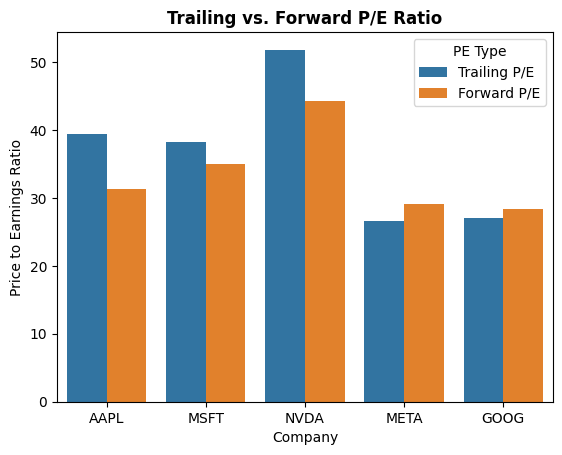

In [7]:
plot_df = pe_df.stack().reset_index()
plot_df.columns = ['Ticker', 'PE Type', 'PE Ratio']
sns.barplot(
    data=plot_df,
    x='Ticker',
    y='PE Ratio',
    hue='PE Type'
)

plt.xlabel('Company')
plt.ylabel('Price to Earnings Ratio')
plt.title('Trailing vs. Forward P/E Ratio', fontweight='bold');

##Free Cashflow

In [ ]:
#Freecashflows
#Free cash flow = operating cf - investing cf
#Measure how much cash the company has left to paying dividends, buy back shares & debts, etc.
#reflecting how comfortable a company is; how much flexibility the company has
freecashflow = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities'] #get recent 4 years of operating cashflow
  icf = cf.loc['Cash Flow From Continuing Investing Activities'] #get recent 4 years of investing cashflow
  fcf = []
  for i,j in zip(opc, icf): #loop over each year's opc and icf for each company
    k = i - j #each year's fcf
    fcf.append(k) #list of fcf for 4 recent years
  freecashflow.append(fcf)
df_fcf = pd.DataFrame(freecashflow, columns=['2025','2024','2023','2022','2021'])
df_fcf.index = tickers
df_fcf.T.dropna()


In [ ]:
df_transposed = df_fcf.transpose()
df_transposed.index = df_transposed.index.astype(int) # Converts the year strings to numbers (e.g., '2022' becomes 2022)
df_transposed.sort_index(ascending=True, inplace=True)
sns.lineplot(data=df_transposed, dashes=False, marker='o')
plt.title('Free Cash Flow Trend (2022–2025)')
plt.ylabel('Free Cash Flow (in hundreds of billions)')
plt.xlabel('Year');

##Cash Conversion Ratio

In [ ]:
#cash conversion ratio
#cash conversion ratio = opc/net income
#How much earnings the company actually receive from net income
#Reflect how true the company's income is
cash_conversion_ratio = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  incomestatment = ticker.financials
  net_income = incomestatment.loc['Net Income']
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  ccr = []
  for i,j in zip(opc, net_income): #loop over each year's opc and net income for each company
    k = i/j # each year's ccr
    ccr.append(k)
  cash_conversion_ratio.append(ccr)
df_ccr = pd.DataFrame(cash_conversion_ratio, columns=['2025','2024','2023','2022','2021'])
df_ccr.index = tickers
df_ccr.T.dropna()


In [ ]:
ccr_plot = df_ccr.transpose()
ccr_plot.index = ccr_plot.index.astype(int)
ccr_plot.sort_index(ascending=True, inplace=True)
sns.lineplot(
    data=ccr_plot,
    dashes=False,
    marker='o',
)

plt.title('Cash Conversion Ratio Trend (2022-2025 Forecast)', fontsize=16)
plt.ylabel('Cash Conversion Ratio (%)', fontsize=12)
plt.xlabel('Year', fontsize=12);

##Return on Invested Capital (ROIC ratio)

In [ ]:
# ROIC = NOPAT / Invested Capital
# where NOPAT = EBIT * (1 - Tax Rate)

roic_ratio = []

for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income = ticker.financials
    balance = ticker.balance_sheet

    ebit = income.loc['Operating Income']
    tax_rate = income.loc['Tax Rate For Calcs']
    invested_capital = balance.loc['Invested Capital']


    roic_each = []
    for e, t, ic in zip(ebit, tax_rate, invested_capital):
          nopat = e * (1 - t)
          roic_each.append((nopat / ic) * 100)
    roic_ratio.append(roic_each)

df_roic = pd.DataFrame(roic_ratio, columns=['2025', '2024', '2023', '2022', '2021'])
df_roic.index = tickers
df_roic = df_roic.T.dropna()

df_roic


In [ ]:
df_roic.index = df_roic.index.astype(int)
df_roic.sort_index(ascending=True, inplace=True)

sns.lineplot(
    data=df_roic,
    dashes=False,
    marker='o',)

plt.title('ROIC from 2022 to 2025', fontsize=16)
plt.ylabel('ROIC', fontsize=12)
plt.xlabel('Year', fontsize=12);

##Revenue

In [ ]:
#Total Revenue
#Revenue growth reflects market demand and pricing power, possibly indicating a company's advantage in the industry
total_revenue = []
for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income_statement = ticker.financials
    tr = income_statement.loc['Total Revenue']
    total_revenue.append(tr.values)
df_tr = pd.DataFrame(
    total_revenue,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_tr = df_tr.T.dropna()
df_tr

In [ ]:
#Revenue change rate
growth_data = {}

for ticker in tickers:
    t = yf.Ticker(ticker)
    income = t.financials
    revenue = income.loc['Total Revenue']
    rev = list(revenue[::-1])#convert pandas series to list, flip its order so the first data is 2022 instead of 2025
    rev = rev[-4:]
    # Growth rates for the 3-year span, as growth rate for the first year, 2022, can not be computed
    rgr_2023 = ((rev[1] - rev[0]) / rev[0]) * 100
    rgr_2024 = ((rev[2] - rev[1]) / rev[1]) * 100
    rgr_2025 = ((rev[3] - rev[2]) / rev[2]) * 100

    growth_data[ticker] = [rgr_2023, rgr_2024, rgr_2025]
df_revenue_growth_rate = pd.DataFrame(growth_data, index=[2023, 2024, 2025]).round(2)
df_revenue_growth_rate


##Earnings per share

In [ ]:
#EPS
#EPS Growth is significant to investors as they hold the company's stock and may benefit from increase in dividends paid due to EPS increases, also meaning that the price of shares itself would likely increase
EPS = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    EPS.append(eps.values)
df_eps = pd.DataFrame(
    EPS,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_eps = df_eps.T.dropna()
df_eps

In [ ]:
#EPS change rate
eps_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    eps = list(eps[::-1])
    eps = eps[-4:]
    g_2023 = ((eps[1] - eps[0]) / eps[0]) * 100       #growth rate of a specific year = (this year - last year)/last year *100%
    g_2024 = ((eps[2] - eps[1]) / eps[1]) * 100
    g_2025 = ((eps[3] - eps[2]) / eps[2]) * 100
    eps_growth.append([g_2023, g_2024, g_2025])
df_eps_growth = pd.DataFrame(
    eps_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_eps_growth

##Net income

In [ ]:
#Net income
net_income = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    net_income.append(ni.values)
df_ni = pd.DataFrame(
    net_income,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_ni = df_ni.T.dropna()
df_ni

In [ ]:
#Net income growth rate
ni_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    ni = list(ni[::-1])
    ni = ni[-4:]
    g_2023 = ((ni[1] - ni[0]) / ni[0]) * 100
    g_2024 = ((ni[2] - ni[1]) / ni[1]) * 100
    g_2025 = ((ni[3] - ni[2]) / ni[2]) * 100
    ni_growth.append([g_2023, g_2024, g_2025])
df_ni_growth = pd.DataFrame(
    ni_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_ni_growth

##Operating Cashflow

In [ ]:
#operating cash flow
#the cash generated from the company's core business operation
#key indicator to how well the company's business is going
OPC = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    OPC.append(opc.values)
df_opc = pd.DataFrame(
    OPC,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_opc = df_opc.T.dropna()
df_opc


In [ ]:
#operating cash flow growth rate
opc_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    opc = list(opc[::-1])
    opc = opc[-4:]
    g_2023 = ((opc[1] - opc[0]) / opc[0]) * 100
    g_2024 = ((opc[2] - opc[1]) / opc[1]) * 100
    g_2025 = ((opc[3] - opc[2]) / opc[2]) * 100
    opc_growth.append([g_2023, g_2024, g_2025])
df_opc_growth = pd.DataFrame(
    opc_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_opc_growth

##Dividends amount

In [8]:
#Dividends

all_tickers_data = yf.Tickers(tickers)
dividends_data = {}

for ticker in tickers:
    ticker_object = all_tickers_data.tickers[ticker]

    divs = ticker_object.dividends
    divs_df = divs.reset_index()
    divs_df = divs_df.rename(columns={'Dividends': 'Dividend Amount'})

    divs_df['Ticker'] = ticker

    dividends_data[ticker] = divs_df
master_dividends_db = pd.concat(dividends_data.values(), ignore_index=True)

master_dividends_db = master_dividends_db[['Ticker', 'Date', 'Dividend Amount']]

master_dividends_db['Date'] = master_dividends_db['Date'].dt.tz_localize(None)   #Apply boolean indexing to filter the rows by date range
master_dividends_db = master_dividends_db[
    (master_dividends_db['Date'] >= pd.to_datetime('2021-01-01')) &
    (master_dividends_db['Date'] <= pd.to_datetime('2025-12-31'))
]
master_dividends_db.head()

,Ticker,Date,Dividend Amount
69,AAPL,2021-02-05,0.205
70,AAPL,2021-05-07,0.220
71,AAPL,2021-08-06,0.220
72,AAPL,2021-11-05,0.220
73,AAPL,2022-02-04,0.220


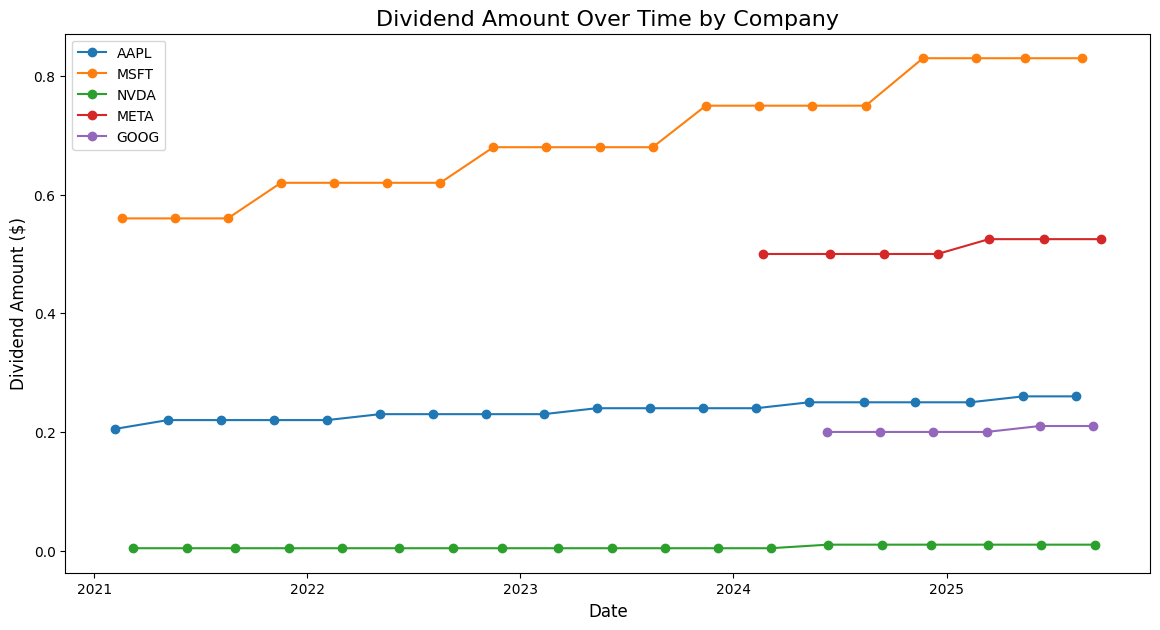

In [11]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
  ticker_data = master_dividends_db[master_dividends_db['Ticker'] == ticker]
  plt.plot(
        ticker_data['Date'],
        ticker_data['Dividend Amount'],
        marker='o',
        label=ticker
    )
plt.title('Dividend Amount Over Time by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dividend Amount ($)', fontsize=12)
plt.legend(loc='upper left')

##Stock price High & Lows

In [ ]:
#stock: high and lows

stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
monthly_last_value = stock_data.resample('M').last()
monthly_last_value

In [ ]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(monthly_last_value.index, monthly_last_value[(ticker, 'High')].values,
             linestyle='--',
             alpha=0.7,
             label=f'{ticker} High')

plt.title('Monthly Closing Price High Trends (2021-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Ticker & Price Level', ncol=3)

#Final DataFrame focused on growth datas-- Percentages of Change (Earnings per share; Revenue; net income; operating cashflow)

In [ ]:
#large Dataframe combining datas we would like to focus on oberserving growth from
data_dict = {
    'EPS change rate (%)': df_eps_growth,
    'Revenue change rate (%)': df_revenue_growth_rate,
    'Net Income change rate (%)': df_ni_growth,
    'Operating Cashflow change rate (%)': df_opc_growth}
big_df = pd.concat(data_dict)
big_df


In [ ]:
#Large Dataframe Visualizations
num_rows = 2
num_cols = 2
data_index = 0
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10)) #create subplots

plot_keys = list(data_dict.keys())

for row in range(num_rows):
    for col in range(num_cols):

        # Stop if we run out of data
        if data_index >= len(plot_keys):
            break

        data = plot_keys[data_index]
        ax= axes[row, col]

        df_data = big_df.loc[data]
        sns.lineplot(data=df_data, ax = ax)

        ax.set_title(data, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Change Rate (%)')

        data_index += 1

plt.tight_layout()
plt.show()

##Investment Valuation Model 1 -- Based on Forward PE ratio & cash conversion ratio

In [ ]:
ccr_latest_series = ccr_plot.iloc[-1]
df_ccr_latest = pd.DataFrame(ccr_latest_series).rename(columns={ccr_latest_series.name: 'Latest CCR'})

In [ ]:
df_evaluation = pe_df[['Forward P/E']].merge(
    df_ccr_latest,
    left_index=True,
    right_index=True
)

df_evaluation    #dataframe combining both the forward P/E and 2025 CCR data

In [ ]:
#function to figure out which company is best to invest in
def evaluate_investments(df_metrics):

  df_metrics['Investment Score'] = (
        df_metrics['Latest CCR'] / df_metrics['Forward P/E']
    )

  df_metrics['Investment Rank'] = df_metrics['Investment Score'].rank(
        ascending=False, method='min'
    ).astype(int)

  df_metrics.sort_values(
        by='Investment Score', ascending=False, inplace=True
    )

  return df_metrics[['Forward P/E', 'Latest CCR', 'Investment Score', 'Investment Rank']]


In [ ]:
df_ranked = evaluate_investments(df_evaluation)
df_ranked

In [ ]:
df_ni.loc['2025'].sort_values(ascending=False)
df_ni.loc['2025'].rename('2025 Net Income in descending order', inplace=True)